**Descargar doc JSON**

In [5]:
import requests
import zipfile
import os

# URL del archivo y nombre local
url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
local_zip = "annotations_trainval2017.zip"

# Descargar el archivo ZIP
print("Descargando el archivo...")
response = requests.get(url)
with open(local_zip, "wb") as f:
    f.write(response.content)

# Extraer el archivo ZIP
print("Extrayendo el archivo...")
with zipfile.ZipFile(local_zip, "r") as zip_ref:
    zip_ref.extractall("annotations")

# Limpiar el archivo ZIP descargado
os.remove(local_zip)
print("¡Descarga y extracción completadas!")

Descargando el archivo...


KeyboardInterrupt: 

**Clases**

In [ ]:
import json

# Ruta al archivo JSON
file_path = "annotations/annotations/instances_train2017.json"

# Cargar el archivo JSON
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Obtener las categorías y sus supercategorías
categories = data.get("categories", [])

# Imprimir cada categoría con su supercategoría de forma enumerada
print("Categorías y sus supercategorías:")
for i, category in enumerate(categories, 1):
    print(f"{i}. Categoría: {category['name']}, Supercategoría: {category['supercategory']}")

Categorías y sus supercategorías:
1. Categoría: person, Supercategoría: person
2. Categoría: bicycle, Supercategoría: vehicle
3. Categoría: car, Supercategoría: vehicle
4. Categoría: motorcycle, Supercategoría: vehicle
5. Categoría: airplane, Supercategoría: vehicle
6. Categoría: bus, Supercategoría: vehicle
7. Categoría: train, Supercategoría: vehicle
8. Categoría: truck, Supercategoría: vehicle
9. Categoría: boat, Supercategoría: vehicle
10. Categoría: traffic light, Supercategoría: outdoor
11. Categoría: fire hydrant, Supercategoría: outdoor
12. Categoría: stop sign, Supercategoría: outdoor
13. Categoría: parking meter, Supercategoría: outdoor
14. Categoría: bench, Supercategoría: outdoor
15. Categoría: bird, Supercategoría: animal
16. Categoría: cat, Supercategoría: animal
17. Categoría: dog, Supercategoría: animal
18. Categoría: horse, Supercategoría: animal
19. Categoría: sheep, Supercategoría: animal
20. Categoría: cow, Supercategoría: animal
21. Categoría: elephant, Supercatego

**pedir id de imagen**

In [6]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt

# Ruta del archivo JSON de anotaciones
file_path = "annotations/annotations/instances_train2017.json"

# Cargar las anotaciones JSON
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Cargar categorías
categories = {cat["id"]: cat["name"] for cat in data["categories"]}

# Crear una función para mostrar una imagen y sus detalles
def visualizar_imagen(image_id, image_dir="train2017 (1)\\train2017"):
    # Buscar la imagen por ID
    image_info = next((img for img in data["images"] if img["id"] == image_id), None)
    if not image_info:
        print(f"No se encontró la imagen con ID {image_id}.")
        return

    # Obtener la ruta de la imagen
    file_name = image_info["file_name"]
    image_path = os.path.join(image_dir, file_name)

    # Mostrar información de la imagen
    print(f"ID de la imagen: {image_info['id']}")
    print(f"Nombre del archivo: {image_info['file_name']}")
    print(f"Dimensiones: {image_info['width']}x{image_info['height']}")

    # Buscar las categorías a las que pertenece la imagen
    # Filtramos las anotaciones de la imagen específica
    image_annotations = [ann for ann in data["annotations"] if ann["image_id"] == image_id]
    
    # Obtener los nombres de las categorías correspondientes y eliminar duplicados
    image_categories = list(set(categories[ann["category_id"]] for ann in image_annotations if ann["category_id"] in categories))

    # Mostrar las categorías de la imagen
    if image_categories:
        print(f"Categorías de la imagen: {', '.join(image_categories)}")
    else:
        print("No se encontraron categorías para esta imagen.")
    
    # Mostrar la imagen
    if os.path.exists(image_path):
        print(f"Ruta completa de la imagen: {os.path.abspath(image_path)}")
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Imagen ID: {image_id}")
        plt.show()
    else:
        print(f"La imagen no se encuentra en la ruta especificada: {os.path.abspath(image_path)}")




In [8]:
# Solicitar al usuario un ID de imagen
image_id = int(input("Ingrese el ID de la imagen que desea visualizar: "))
visualizar_imagen(image_id, image_dir="train2017 (1)\\train2017")

ID de la imagen: 106637
Nombre del archivo: 000000106637.jpg
Dimensiones: 640x480
Categorías de la imagen: person, baseball bat, baseball glove
La imagen no se encuentra en la ruta especificada: c:\Users\Jonna\Desktop\ups\6to ciclo\IA\interciclo\train2017 (1)\train2017\000000106637.jpg


**Diagrama de frecuencia**

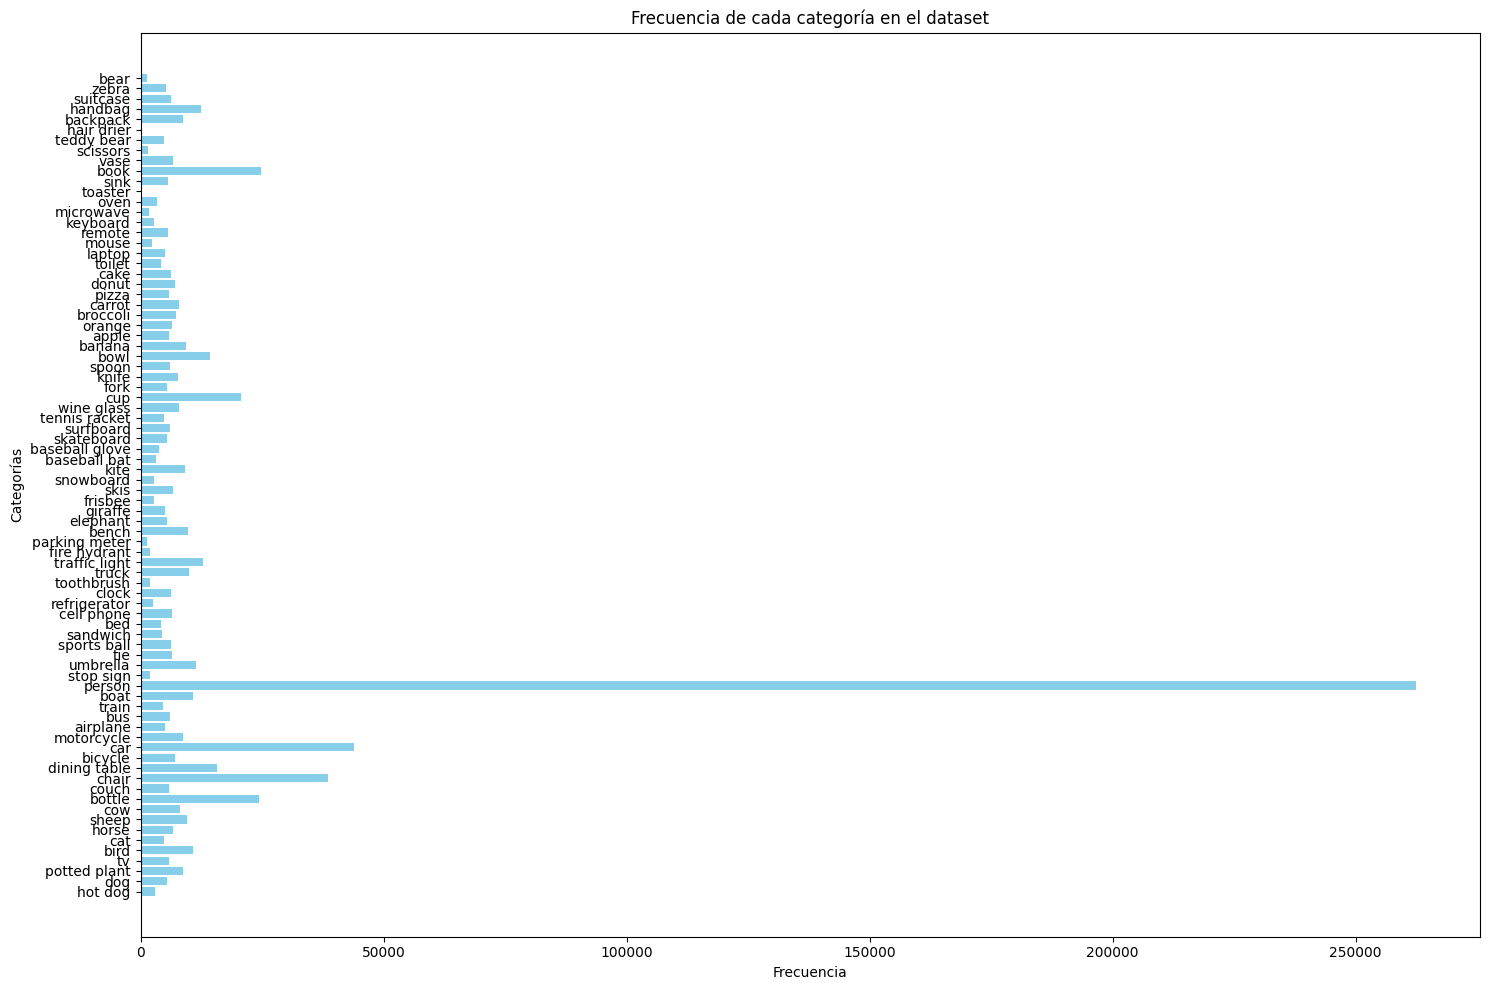

In [9]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter

# Ruta del archivo JSON de anotaciones
file_path = "annotations/annotations/instances_train2017.json"

# Cargar las anotaciones JSON
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Cargar categorías
categories = {cat["id"]: cat["name"] for cat in data["categories"]}

# Contar la frecuencia de cada categoría en las anotaciones
category_ids = [ann["category_id"] for ann in data["annotations"]]
category_names = [categories[cat_id] for cat_id in category_ids]

# Contar las ocurrencias de cada categoría
category_counts = Counter(category_names)

# Preparar los datos para el gráfico
categories_list = list(category_counts.keys())
counts_list = list(category_counts.values())

# Crear un gráfico de barras
plt.figure(figsize=(15, 10))
plt.barh(categories_list, counts_list, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Categorías')
plt.title('Frecuencia de cada categoría en el dataset')

# Rotar las etiquetas del eje Y para mejorar la legibilidad
plt.yticks(rotation=0)

# Ajustar el diseño para evitar el solapamiento de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**Relaciones entre categorias**

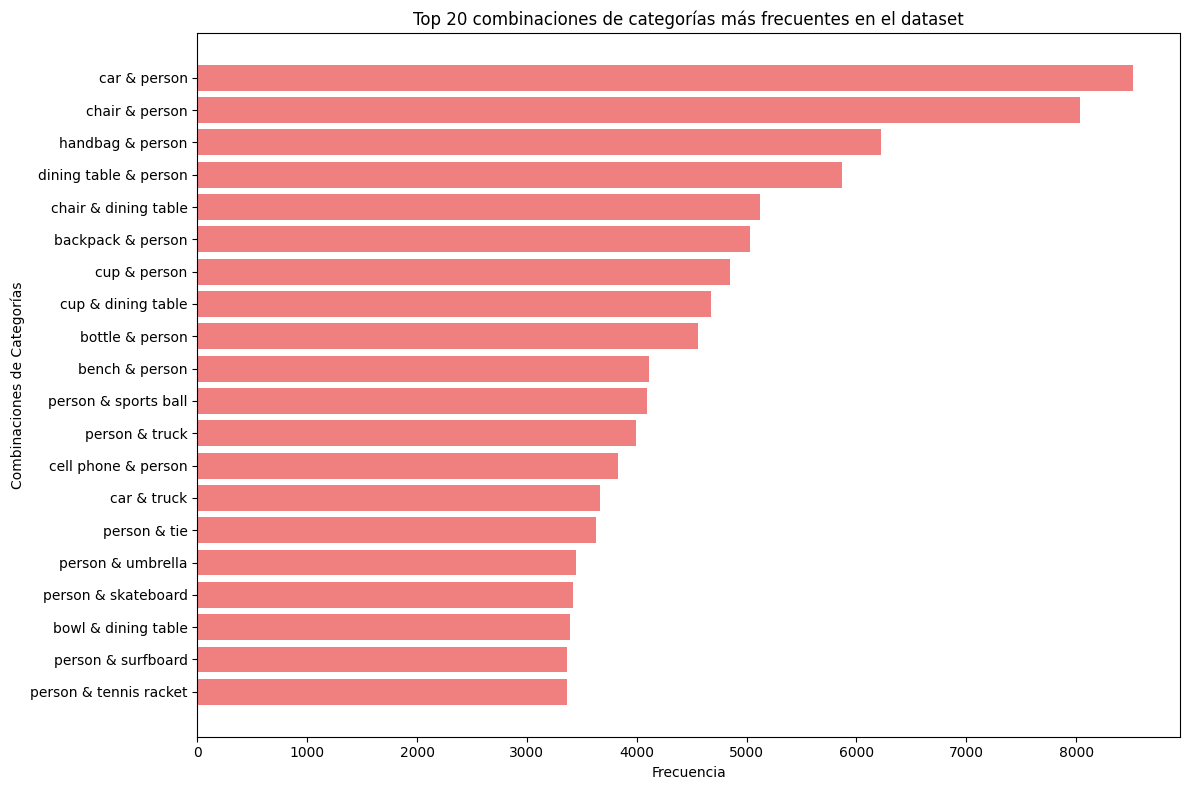

In [10]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

# Ruta del archivo JSON de anotaciones
file_path = "annotations/annotations/instances_train2017.json"

# Cargar las anotaciones JSON
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Cargar categorías
categories = {cat["id"]: cat["name"] for cat in data["categories"]}

# Crear un diccionario para las anotaciones por imagen
image_annotations = {}

# Llenar el diccionario con las categorías por cada imagen
for ann in data["annotations"]:
    image_id = ann["image_id"]
    category_name = categories[ann["category_id"]]
    
    if image_id not in image_annotations:
        image_annotations[image_id] = set()
    
    image_annotations[image_id].add(category_name)

# Contar las combinaciones de categorías en cada imagen
combinations_count = Counter()

for categories_in_image in image_annotations.values():
    # Generar todas las combinaciones posibles de categorías, asegurando un orden fijo
    for combo in combinations(sorted(categories_in_image), 2):  # Combinaciones de 2 categorías
        combinations_count[combo] += 1

# Preparar los datos para el gráfico
combos_list = list(combinations_count.keys())
counts_list = list(combinations_count.values())

# Ordenar combinaciones por frecuencia en orden descendente
sorted_combos = sorted(zip(combos_list, counts_list), key=lambda x: x[1], reverse=True)

# Seleccionar las 20 combinaciones más frecuentes (puedes ajustar este número)
top_combos = sorted_combos[:20]
top_combos, top_counts = zip(*top_combos)

# Crear un gráfico de barras para las combinaciones de categorías más frecuentes
plt.figure(figsize=(12, 8))
plt.barh([' & '.join(combo) for combo in top_combos], top_counts, color='lightcoral')
plt.xlabel('Frecuencia')
plt.ylabel('Combinaciones de Categorías')
plt.title('Top 20 combinaciones de categorías más frecuentes en el dataset')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar las combinaciones más frecuentes primero
plt.tight_layout()
plt.show()
